Most applications of single-cell RNA-seq focus on the analysis of gene expression.  However, single-cell RNA-seq data also have rich information on the expression of individual transcript variants generated by alternative splicing and poly-adenylation, which represent major drivers of molecular diversity in mammals, especially in the nervous system.  For example, the SMART-seq protocol produces full length read coverage, which can be used to quantify alternative splicing (e.g., Tasic et al. Nature Neurosci, 2016, 19:335-346; Tasic et al. Nature 2018, 563:72-78).  
In this project, the students will analyze such a dataset to identify alternative exons that are differentially used in specific neuronal subtypes.  
Certain technical challenges specific for single-cell RNA-seq data might need to be addressed for accurate quantification.  If time allows, the project will also investigate the regulatory elements shared by events under co-regulation and the cognate RNA-binding proteins.


In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata

In [38]:
df_norm = pd.read_csv("../data/GSE115746/CSV/exon_10genes.csv",index_col=0) 
df_raw = pd.read_csv("../data/GSE115746/CSV/exon_10genes_raw.csv",index_col=0)
metadata = pd.read_csv("../data/GSE115746/GSE115746_complete_metadata_28706-cells.csv",index_col=0)

In [39]:
ad_raw = anndata.AnnData(df_raw.T)
ad_norm = anndata.AnnData(df_norm.T)

In [27]:
metadata.head()

,title,source_name,organism,donor_id,donor_sex,donor_genotype,injection_type,injection_target,injected_material,dissected_region,...,sequencing_tube,sequencing_batch,sequencing_qc_pass_fail,cell_class,cell_subclass,cell_cluster,molecule,SRA_Run,GEO_Sample,GEO_Sample_Title
sample_name,,,,,,,,,,,,,,,,,,,,,
F0S4_150820_019_A01,F0S4_150820_019_A01,Control: 1E-8 ERCC MIX1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LS-14690,R8S4-160203,Pass,ERCC,NaN,NaN,ERCC,SRR7322881,GSM3189899,Control: 1E-8 ERCC MIX1_1
F0S4_150820_019_B01,F0S4_150820_019_B01,Control: No Template Control,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LS-14690,R8S4-160203,Pass,NTC,NaN,NaN,Total RNA,SRR7323629,GSM3189901,Control: No Template Control_1
F0S4_150820_019_C01,F0S4_150820_019_C01,Control: 1E-8 ERCC MIX1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LS-14690,R8S4-160203,Pass,ERCC,NaN,NaN,ERCC,SRR7322992,GSM3189899,Control: 1E-8 ERCC MIX1_1
F0S4_150820_019_D01,F0S4_150820_019_D01,Control: No Template Control,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LS-14690,R8S4-160203,Pass,NTC,NaN,NaN,Total RNA,SRR7323740,GSM3189901,Control: No Template Control_1
F0S4_150820_019_E01,F0S4_150820_019_E01,Control: 10pg Zyagen Mouse Whole Brain Total RNA,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LS-14690,R8S4-160203,Pass,MouseWholeRNA,NaN,NaN,Total RNA,SRR7321958,GSM3189897,Control: 10pg Zyagen Mouse Whole Brain Total R...


Show those genes that yield the highest fraction of counts in each single cells, across all cells.

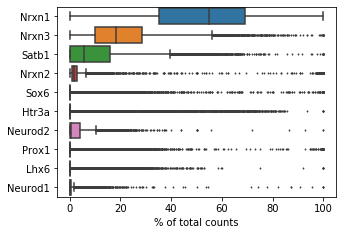

In [10]:
sc.pl.highest_expr_genes(ad_raw, n_top=10)

In [19]:
cellID = list(df_raw.columns)

In [41]:
ad_norm.obs["louvain"] = metadata.loc[cellID, "cell_cluster"]

In [ ]:
Pyramidal_clusters = {'L2/3 IT ALM Macc1 Lrg1',
 'L2/3 IT ALM Ptrf',
 'L2/3 IT ALM Sla',
 'L2/3 IT VISp Adamts2',
 'L2/3 IT VISp Agmat',
 'L2/3 IT VISp Rrad',
 'L4 IT VISp Rspo1',
 'L5 IT ALM Cbln4 Fezf2',
 'L5 IT ALM Cpa6 Gpr88',
 'L5 IT ALM Gkn1 Pcdh19',
 'L5 IT ALM Lypd1 Gpr88',
 'L5 IT ALM Npw',
 'L5 IT ALM Pld5',
 'L5 IT ALM Tmem163 Arhgap25',
 'L5 IT ALM Tmem163 Dmrtb1',
 'L5 IT ALM Tnc',
 'L5 IT VISp Batf3',
 'L5 IT VISp Col27a1',
 'L5 IT VISp Col6a1 Fezf2',
 'L5 IT VISp Hsd11b1 Endou',
 'L5 IT VISp Whrn Tox2',
 'L5 NP ALM Trhr Nefl',
 'L5 NP VISp Trhr Cpne7',
 'L5 NP VISp Trhr Met',
 'L5 PT ALM Hpgd',
 'L5 PT ALM Npsr1',
 'L5 PT ALM Slco2a1',
 'L5 PT VISp C1ql2 Cdh13',
 'L5 PT VISp C1ql2 Ptgfr',
 'L5 PT VISp Chrna6',
 'L5 PT VISp Krt80',
 'L5 PT VISp Lgr5',
 'L6 CT ALM Cpa6',
 'L6 CT ALM Nxph2 Sla',
 'L6 CT VISp Ctxn3 Brinp3',
 'L6 CT VISp Ctxn3 Sla',
 'L6 CT VISp Gpr139',
 'L6 CT VISp Krt80 Sla',
 'L6 CT VISp Nxph2 Wls',
 'L6 IT ALM Oprk1',
 'L6 IT ALM Tgfb1',
 'L6 IT VISp Car3',
 'L6 IT VISp Col18a1',
 'L6 IT VISp Col23a1 Adamts2',
 'L6 IT VISp Penk Col27a1',
 'L6 IT VISp Penk Fst',
 'L6 NP ALM Trh',
 'L6b ALM Olfr111 Nxph1',
 'L6b ALM Olfr111 Spon1',
 'L6b Hsd17b2',
 'L6b P2ry12',
 'L6b VISp Col8a1 Rprm',
 'L6b VISp Col8a1 Rxfp1',
 'L6b VISp Crh',
 'L6b VISp Mup5'}

Prox1_clusters = {'Lamp5 Fam19a1 Pax6',
 'Lamp5 Fam19a1 Tmem182',
 'Lamp5 Krt73',
 'Lamp5 Lsp1',
 'Lamp5 Ntn1 Npy2r',
 'Lamp5 Plch2 Dock5','Sncg Gpr50',
 'Sncg Slc17a8',
 'Sncg Vip Itih5',
 'Sncg Vip Nptx2','Vip Arhgap36 Hmcn1',
 'Vip Chat Htr1f',
 'Vip Col15a1 Pde1a',
 'Vip Crispld2 Htr2c',
 'Vip Crispld2 Kcne4',
 'Vip Gpc3 Slc18a3',
 'Vip Igfbp4 Mab21l1',
 'Vip Igfbp6 Car10',
 'Vip Igfbp6 Pltp',
 'Vip Lect1 Oxtr',
 'Vip Lmo1 Fam159b',
 'Vip Lmo1 Myl1',
 'Vip Ptprt Pkp2',
 'Vip Pygm C1ql1',
 'Vip Rspo1 Itga4',
 'Vip Rspo4 Rxfp1 Chat'}

Lhx6_clusters = {'Lamp5 Lhx6',
        'Sst Calb2 Necab1',
 'Sst Calb2 Pdlim5',
 'Sst Chodl',
 'Sst Chrna2 Glra3',
 'Sst Chrna2 Ptgdr',
 'Sst Crh 4930553C11Rik',
 'Sst Crhr2 Efemp1',
 'Sst Esm1',
 'Sst Hpse Cbln4',
 'Sst Hpse Sema3c',
 'Sst Mme Fam114a1',
 'Sst Myh8 Etv1',
 'Sst Myh8 Fibin',
 'Sst Nr2f2 Necab1',
 'Sst Nts',
 'Sst Rxfp1 Eya1',
 'Sst Rxfp1 Prdm8',
 'Sst Tac1 Htr1d',
 'Sst Tac1 Tacr3',
 'Sst Tac2 Myh4',
 'Sst Tac2 Tacstd2',
 'Pvalb Akr1c18 Ntf3',
 'Pvalb Calb1 Sst',
 'Pvalb Gabrg1',
 'Pvalb Gpr149 Islr',
 'Pvalb Reln Itm2a',
 'Pvalb Reln Tac1',
 'Pvalb Sema3e Kank4',
 'Pvalb Th Sst',
 'Pvalb Tpbg',
 'Pvalb Vipr2'}

all_clusters = set(metadata.loc[:, "cell_cluster"])
other_clusters  = all_clusters - Pyramidal_clusters - Prox1_clusters - Lhx6_clusters
clusters_order = list(Pyramidal_clusters)+ list(Prox1_clusters) + list(Lhx6_clusters) + list(other_clusters)


### FIgure 1a
Violin plots show averaged developmental marker-gene exon expression (Neurod1 through Htr3a) in different cortical cell types (columns)\\

Cell types were as published by the Allen Institute and grouped on the basis of Lhx6, Prox1, and Neurod2 expression. Neurexins (Nrxn1 through Nrxn3) were consistently expressed in all neuron types. 

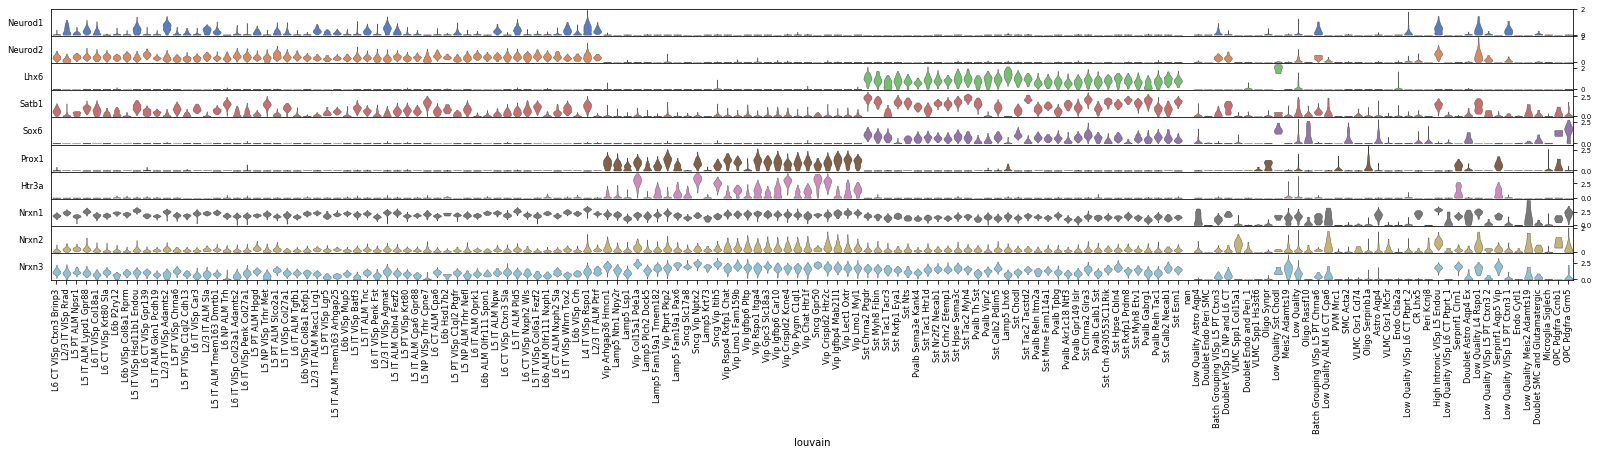

In [67]:
marker_genes = ["Neurod1", "Neurod2", "Lhx6", "Satb1", "Sox6", "Prox1", "Htr3a", "Nrxn1", "Nrxn2", "Nrxn3"]
ax = sc.pl.stacked_violin(ad_norm, marker_genes, groupby='louvain', var_group_rotation=90, swap_axes = True, figsize=(30, 5), order = clusters_order)

exon raw data

... storing 'louvain' as categorical


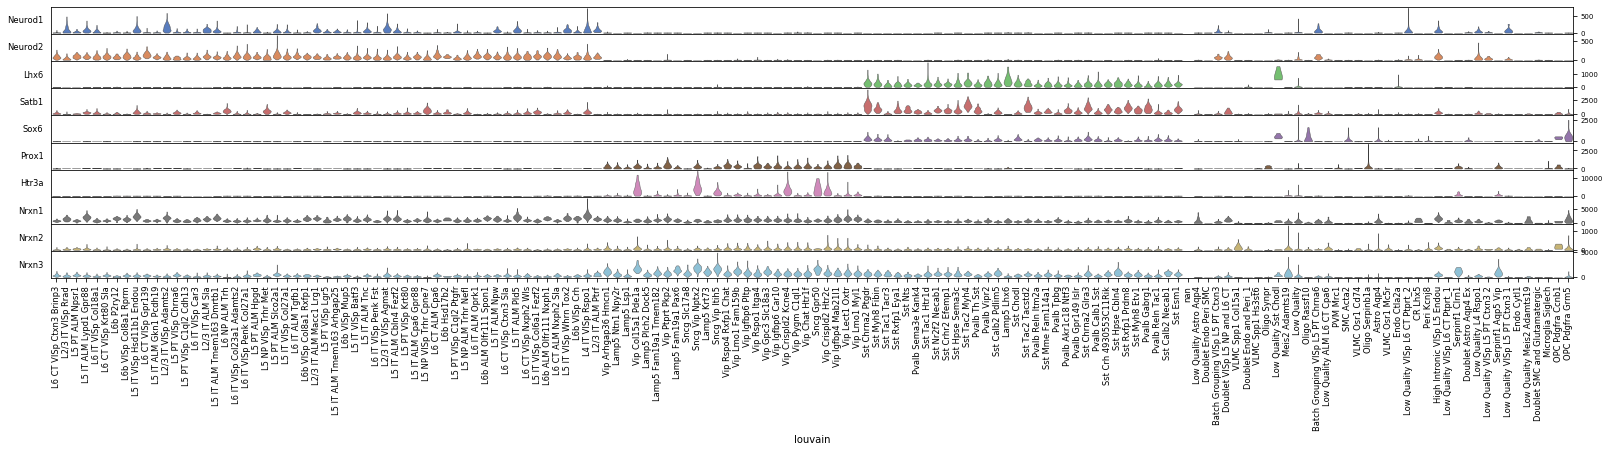

In [69]:
ad_raw.obs["louvain"] = metadata.loc[cellID, "cell_cluster"]
marker_genes = ["Neurod1", "Neurod2", "Lhx6", "Satb1", "Sox6", "Prox1", "Htr3a", "Nrxn1", "Nrxn2", "Nrxn3"]
ax = sc.pl.stacked_violin(ad_raw, marker_genes, groupby='louvain', var_group_rotation=90, swap_axes = True, figsize=(30, 5), order = clusters_order)

Intron normalized data

In [70]:
df_intron_norm = pd.read_csv("../data/GSE115746/CSV/intron_10genes_norm.csv",index_col=0)
ad_intron_norm = anndata.AnnData(df_intron_norm.T)

... storing 'louvain' as categorical


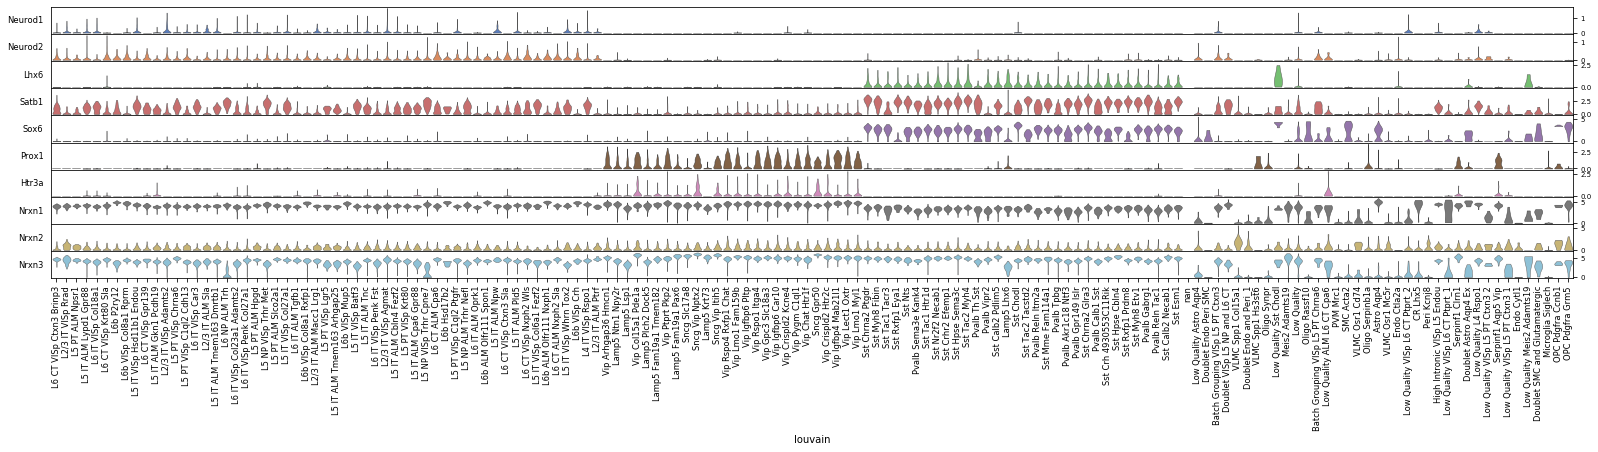

In [71]:
ad_intron_norm.obs["louvain"] = metadata.loc[cellID, "cell_cluster"]
marker_genes = ["Neurod1", "Neurod2", "Lhx6", "Satb1", "Sox6", "Prox1", "Htr3a", "Nrxn1", "Nrxn2", "Nrxn3"]
ax = sc.pl.stacked_violin(ad_intron_norm, marker_genes, groupby='louvain', var_group_rotation=90, swap_axes = True, figsize=(30, 5), order = clusters_order)

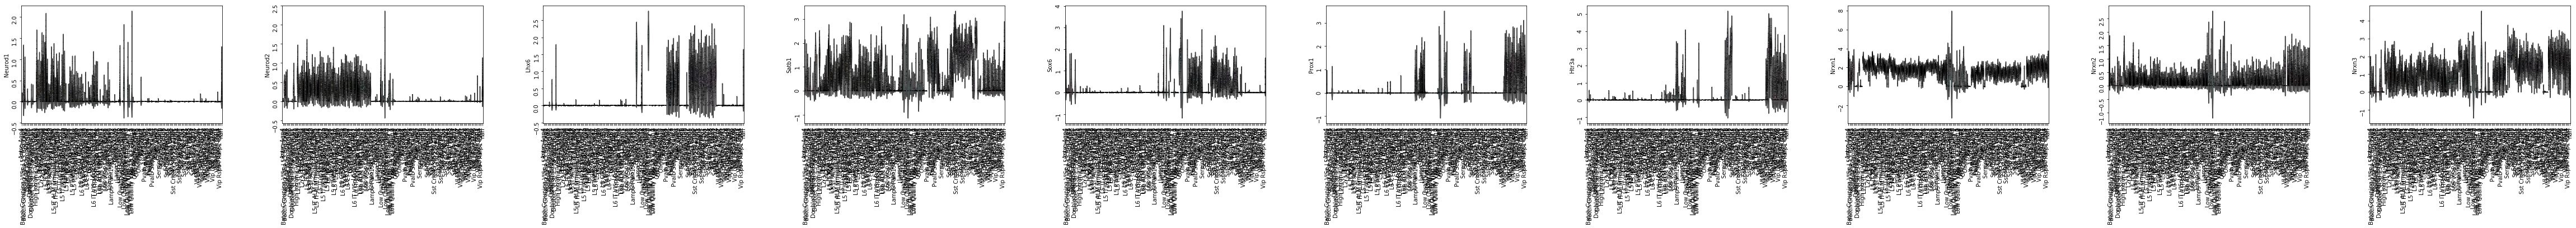

In [78]:
sc.pl.violin(ad_norm, marker_genes, groupby='louvain', rotation = 90)

# reference 

# analyze exon count

In [24]:
phn1 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_accession_table.csv.gz",\
                index_col=0, sep='\t')
phn2 = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115746/suppl/GSE115746_complete_metadata_28706-cells.csv.gz",\
                index_col=0)

In [25]:
cts = pd.read_csv("../data/GSE115746/CSV/exon_counts_all.csv", index_col=0)
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.T.values))
ad.obs_names = cts.columns
ad.var_names = cts.index

ad = ad[ad.obs_names.isin(phn2.index),:]
phn = phn2.loc[ad.obs_names]
ad.obs['x'] =''
ad.obs = phn

ad.write("../data/GSE115746/h5/Tasic2018Cortex_intron.h5")

MemoryError: 

## Analysis

In [ ]:
# delete useless cells 
ad = ad[ad.obs['sequencing_qc_pass_fail']=='Pass',:]
ad = ad[~ad.obs['cell_class'].isin(['Low Quality','No Class'])]
ad = ad[~ad.obs['cell_class'].isin(['ERCC','ControlTotalRNA','MouseWholeRNA'])]
ad = ad[~ad.obs['cell_subclass'].isin(['nan'])]

sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_cells(ad, min_counts=200)
sc.pp.filter_genes(ad, min_cells=3)

sc.pl.violin(ad, ['n_genes', 'n_counts'],
             jitter=0.01, multi_panel=True, cut=0)

In [ ]:
figsize(4,4)
sc.pl.scatter(ad, x='n_counts', y='n_genes')

## preprocess
Show those genes that yield the highest fraction of counts in each single cells, across all cells.

In [ ]:
sc.pl.highest_expr_genes(ad, n_top=20)